In [ ]:
!pip install transformers

In [ ]:
import pandas as pd
import numpy as np
import spacy
from transformers import BertTokenizer, TFBertModel
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

In [ ]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)
import sys
print(sys.version)

2.15.0
2.15.0
3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [ ]:
# Load the data
df = pd.read_csv('/content/translated_amazon_reviews (2).csv')
df = df.dropna()

# Split the data into training and validation sets
train_text, val_text, train_labels, val_labels = train_test_split(df['text'], df['label'], test_size=0.1, random_state=42)




In [ ]:
# import pickle
# print(type(tokenizer))
# # Save the Tokenizer
# with open('tokenizer_LSTM.pickle', 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
# # Create a Tokenizer object
# tokenizer = Tokenizer(num_words=5000)
# tokenizer.fit_on_texts(train_text)


# # Convert the text data into sequences of tokens
# train_sequences = tokenizer.texts_to_sequences(train_text)
# val_sequences = tokenizer.texts_to_sequences(val_text)

# # Pad the sequences to have the same length
# max_length = 200
# padded_train = pad_sequences(train_sequences, maxlen=max_length)
# padded_val = pad_sequences(val_sequences, maxlen=max_length)

# # Define the LSTM model
# model = Sequential()
# model.add(Embedding(5000, 128, input_length=max_length))
# model.add(LSTM(64, dropout=0.1))
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# model.fit(padded_train, train_labels, epochs=5, validation_data=(padded_val, val_labels))

In [ ]:
# Create a Tokenizer object
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_text)

# Convert the text data into sequences of tokens
train_sequences = tokenizer.texts_to_sequences(train_text)
val_sequences = tokenizer.texts_to_sequences(val_text)

# Pad the sequences to have the same length
max_length = 250  # Increased from 200 to 250
padded_train = pad_sequences(train_sequences, maxlen=max_length)
padded_val = pad_sequences(val_sequences, maxlen=max_length)

# Define the LSTM model
model = Sequential()
model.add(Embedding(5000, 256, input_length=max_length))  # Increased embedding dimensions from 128 to 256
model.add(LSTM(128, dropout=0.2))  # Increased LSTM units from 64 to 128 and dropout from 0.1 to 0.2
model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# model.fit(padded_train, train_labels, epochs=10, validation_data=(padded_val, val_labels), batch_size=32)  # Increased epochs from 5 to 10 and added batch size of 32

Epoch 1/10
450/450 [==============================] - 283s 624ms/step - loss: 0.4738 - accuracy: 0.7713 - val_loss: 0.3783 - val_accuracy: 0.8380
Epoch 2/10
450/450 [==============================] - 258s 574ms/step - loss: 0.3170 - accuracy: 0.8643 - val_loss: 0.3851 - val_accuracy: 0.8261
Epoch 3/10
450/450 [==============================] - 257s 572ms/step - loss: 0.2518 - accuracy: 0.8953 - val_loss: 0.3987 - val_accuracy: 0.8318
Epoch 4/10
450/450 [==============================] - 276s 612ms/step - loss: 0.2034 - accuracy: 0.9140 - val_loss: 0.4374 - val_accuracy: 0.8236
Epoch 5/10
450/450 [==============================] - 253s 563ms/step - loss: 0.1703 - accuracy: 0.9323 - val_loss: 0.5001 - val_accuracy: 0.8268
Epoch 6/10
450/450 [==============================] - 253s 561ms/step - loss: 0.1370 - accuracy: 0.9448 - val_loss: 0.5865 - val_accuracy: 0.8299
Epoch 7/10
450/450 [==============================] - 263s 585ms/step - loss: 0.1288 - accuracy: 0.9488 - val_loss: 0.5746 -

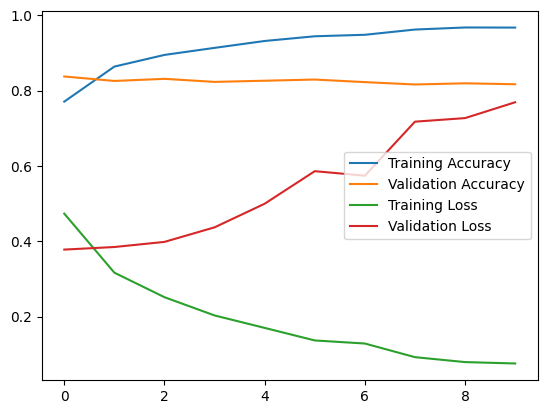

In [ ]:
import matplotlib.pyplot as plt

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(padded_train, train_labels, epochs=10, validation_data=(padded_val, val_labels), batch_size=32)

# Increased epochs from 5 to 10 and added batch size of 32

# Plot the accuracy and loss curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

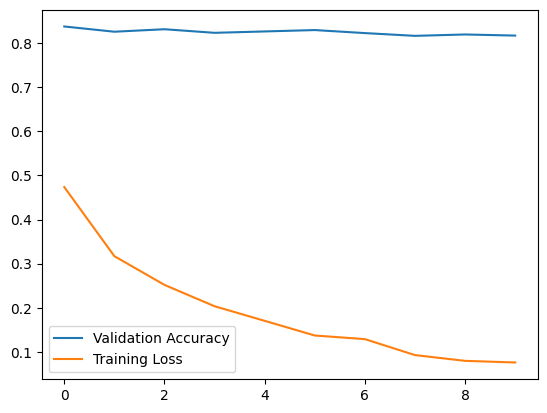

In [ ]:
# Plot the accuracy and loss curve
# plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Make predictions on the validation set
predictions = model.predict(padded_val)

# Convert the predictions to binary labels (0 or 1)
predicted_labels = (predictions > 0.5).astype('int32')

50/50 [==============================] - 8s 161ms/step


In [ ]:
print(predicted_labels)

[[0]
 [0]
 [1]
 ...
 [0]
 [1]
 [0]]


In [ ]:
from sklearn.metrics import confusion_matrix
# Print the confusion matrix
conf_mat = confusion_matrix(val_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_mat)
print("Acuraccy")
print((conf_mat[0][0] + conf_mat[1][1])/(conf_mat[0][0] + conf_mat[1][1] + conf_mat[1][0] + conf_mat[0][1]))

Confusion Matrix:
[[675 142]
 [150 632]]
Acuraccy
0.817385866166354


In [ ]:
# from joblib import dump
# dump(model, 'LSTM1.joblib')

In [ ]:
model.save('LSTM5.keras')

In [ ]:
import pickle
with open('LSTM5.pickle', 'wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
model.save("LSTM5.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
